<a href="https://colab.research.google.com/github/mmfsb/Covid-19-Pre-existing-Medical-Condition-Analysis/blob/main/Covid_19_Death_Medical_Analysis_%26_Visualization_using_Plotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Covid-19 Pre-existing Medical Condition Analysis using Plotly Express, Choropleth maps and WordCloud Text Visualization

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

##Task 1 : Importing all the necessary libraries

In [ ]:
import pandas as pd       #Data analysis and Manipulation
import plotly.express as px    #Data Visualization (one line of code for one graph) 
import matplotlib.pyplot as plt   #Data Visualization for WordCloud
from wordcloud import WordCloud   #Wordcloud Text Visualization


In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'     # To initialize plotly (default mode of plotly if OFF as it consumes a lot of space)

##Task 2 : Importing the dataset and Visualizing it (Dataset 1 : Worldometer dataset)

In [ ]:
from google.colab import files
files.upload()

Saving covid_worldometer_data.csv to covid_worldometer_data.csv


{'covid_worldometer_data.csv': b'S.no,Country,TotalCases,TotalDeaths,Total Recovered,Active cases,Totalcases/1M,TotalDeath/1M,iso_alpha\n1,USA,"23,848,410","397,994","14,112,119","9,338,297","71,822","1,199",USA\n2,India,"10,528,508","151,954","10,162,738","213,816","7,589",110,IND\n3,Brazil,"8,326,115","207,160","7,339,703","779,252","39,021",971,BRA\n4,Russia,"3,495,816","63,940","2,882,044","549,832","23,949",438,RUS\n5,UK,"3,260,258","86,015","1,406,967","1,767,276","47,890","1,263",UKR\n6,France,"2,851,670","69,313","206,802","2,575,555","43,636","1,061",FRA\n7,Turkey,"2,364,801","23,495","2,236,938","104,368","27,878",277,TUR\n8,Italy,"2,336,279","80,848","1,694,051","561,380","38,671","1,338",ITA\n9,Spain,"2,211,967","53,079",,,"47,300","1,135",ESP\n10,Germany,"2,004,011","45,492","1,641,200","317,319","23,878",542,DEU\n11,Colombia,"1,849,101","47,491","1,683,835","117,775","36,133",928,COL\n12,Argentina,"1,770,715","45,125","1,549,490","176,100","38,986",994,ARG\n13,Mexico,"1,5

In [ ]:
df=pd.read_csv("covid_worldometer_data.csv")

In [ ]:
df

,S.no,Country,TotalCases,TotalDeaths,Total Recovered,Active cases,Totalcases/1M,TotalDeath/1M,iso_alpha
0,1,USA,"23,848,410","397,994","14,112,119","9,338,297","71,822","1,199",USA
1,2,India,"10,528,508","151,954","10,162,738","213,816","7,589",110,IND
2,3,Brazil,"8,326,115","207,160","7,339,703","779,252","39,021",971,BRA
3,4,Russia,"3,495,816","63,940","2,882,044","549,832","23,949",438,RUS
4,5,UK,"3,260,258","86,015","1,406,967","1,767,276","47,890","1,263",UKR
...,...,...,...,...,...,...,...,...,...
216,217,Wallis and Futuna,4,,1,3,359,NaN,WLF
217,218,Samoa,2,,2,0,10,NaN,WSM
218,219,Micronesia,1,,NaN,1,9,NaN,FSM
219,220,Vanuatu,1,,1,0,3,NaN,VUT


In [ ]:
px.bar(df.head(15), x="Country", y="TotalCases", color="Country")

In [ ]:
px.bar(df.head(15), x="Country", y="TotalDeaths", color="Country")

In [ ]:
df.columns

Index(['S.no', 'Country', 'TotalCases', 'TotalDeaths', 'Total Recovered',
       'Active cases', 'Totalcases/1M', 'TotalDeath/1M', 'iso_alpha'],
      dtype='object')

In [ ]:
px.scatter(df, x="Totalcases/1M", y="TotalDeath/1M", color="Country")

##Task 3: Geographic Visualization using Choropleth maps

In [ ]:
# A choropleth map displays divided geographical areas or regions that are coloured, shaded or patterned in relation to a data variable. 
#Amazing Representation of data in a map . Choropleth maps provide an easy way to visualize how a measurement varies across a geographic area.

#Dataset 1
#parameters= dataset, locations= ISOALPHA, color, hover_name, color_continuous_scale= [RdYlGn, Blues, Viridis...], 
#

In [ ]:
df.columns

Index(['S.no', 'Country', 'TotalCases', 'TotalDeaths', 'Total Recovered',
       'Active cases', 'Totalcases/1M', 'TotalDeath/1M', 'iso_alpha'],
      dtype='object')

In [ ]:
px.choropleth(df, 
              locations="iso_alpha",
              hover_name="Country",
              color="TotalDeath/1M",
              projection="orthographic",
              color_continuous_scale="Viridis")

In [ ]:
px.choropleth(df, 
              locations="iso_alpha",
              hover_name="Country",
              color="TotalDeath/1M",
              projection="equirectangular",
              color_continuous_scale="Plasma")

In [ ]:
px.choropleth(df, 
              locations="iso_alpha",
              hover_name="Country",
              color="TotalDeath/1M",
              scope="asia",
              color_continuous_scale="Viridis")

##Task 4: Importing and Analyzing the dataset(Dataset 2: Covid-19 Pre-existing condition Medical dataset; source: CDC,US)

In [ ]:
from google.colab import files
files.upload()

In [ ]:
df1 = pd.read_csv("US_medical_data.csv")

In [ ]:
df1

In [ ]:
df1.groupby(["State"]).count()

In [ ]:
df1.groupby(["Condition Group"]).count()

In [ ]:
df1.groupby(["Condition"]).count()

In [ ]:
df1.groupby(["Age Group"]).count()

##Task 5: Visualizing the Pre-existing condition Medical dataset

In [ ]:
filter1=df1[(df1["State"]=="US")]

In [ ]:
px.bar(df1, x="Age Group", y="COVID-19 Deaths", color="Condition", hover_name="Condition", log_y=True)

In [ ]:
px.bar(filter1, x="Age Group", y="COVID-19 Deaths", color="Condition Group", hover_name="Condition")

In [ ]:
filter2= df1[(df1["State"]=="US") & (df1["Age Group"]=="All Ages")]

In [ ]:
filter2.columns

Index(['Data as of', 'Start Week', 'End Week', 'State', 'Condition Group',
       'Condition', 'ICD10_codes', 'Age Group', 'COVID-19 Deaths',
       'Number of Mentions', 'Flag'],
      dtype='object')

In [ ]:
px.bar(filter2, x="Condition Group", y="COVID-19 Deaths", color="COVID-19 Deaths", hover_name="Condition")

In [ ]:
filter3= df1[(df1["Condition"]=="Influenza and pneumonia") & (df1["Age Group"]=="All Ages")]

In [ ]:
filter3

,Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
9,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,139430.0,141763.0,NaN
239,1/10/2021,1/4/2020,1/9/2021,AL,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,1734.0,1755.0,NaN
469,1/10/2021,1/4/2020,1/9/2021,AK,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,86.0,90.0,NaN
699,1/10/2021,1/4/2020,1/9/2021,AZ,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,4171.0,4239.0,NaN
929,1/10/2021,1/4/2020,1/9/2021,AR,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,1393.0,1408.0,NaN
1159,1/10/2021,1/4/2020,1/9/2021,CA,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,13016.0,13118.0,NaN
1389,1/10/2021,1/4/2020,1/9/2021,CO,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,1872.0,1914.0,NaN
1619,1/10/2021,1/4/2020,1/9/2021,CT,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,1107.0,1127.0,NaN
1849,1/10/2021,1/4/2020,1/9/2021,DE,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,297.0,304.0,NaN
2079,1/10/2021,1/4/2020,1/9/2021,DC,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,773.0,773.0,NaN


In [ ]:
px.bar(filter3, x="State", y="COVID-19 Deaths", color="State", log_y=True)

##Task 6: WordCloud Text Visualization

In [ ]:
#Step a= Convert the columns with conditions and condition group into list using tolist() function
#Step b= Convert the list to one single string
#Step c= Convert the string into WordCloud
# WordCloud imported in task 1. # WordCloud visualization needs matplotlib

###WordCloud 1- Condition group

In [ ]:
df1

,Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,198.0,205.0,NaN
1,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,968.0,985.0,NaN
2,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,2537.0,2584.0,NaN
3,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,7369.0,7555.0,NaN
4,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,18378.0,18829.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
12415,1/10/2021,1/4/2020,1/9/2021,PR,COVID-19,COVID-19,U071,65-74,321.0,321.0,NaN
12416,1/10/2021,1/4/2020,1/9/2021,PR,COVID-19,COVID-19,U071,75-84,366.0,366.0,NaN
12417,1/10/2021,1/4/2020,1/9/2021,PR,COVID-19,COVID-19,U071,85+,264.0,264.0,NaN
12418,1/10/2021,1/4/2020,1/9/2021,PR,COVID-19,COVID-19,U071,Not stated,0.0,0.0,NaN


In [ ]:
filter2

,Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
9,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,139430.0,141763.0,NaN
19,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Chronic lower respiratory diseases,J40-J47,All Ages,28359.0,29326.0,NaN
29,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Adult respiratory distress syndrome,J80,All Ages,36915.0,36915.0,NaN
39,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Respiratory failure,J96,All Ages,114543.0,117102.0,NaN
49,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Respiratory arrest,R09.2,All Ages,6727.0,6727.0,NaN
59,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Other diseases of the respiratory system,"J00-J06, J20-J39, J60-J70, J81-J86, J90-J95, J...",All Ages,11885.0,12352.0,NaN
69,1/10/2021,1/4/2020,1/9/2021,US,Circulatory diseases,Hypertensive diseases,I10-I15,All Ages,65095.0,65600.0,NaN
79,1/10/2021,1/4/2020,1/9/2021,US,Circulatory diseases,Ischemic heart disease,I20-I25,All Ages,34943.0,36863.0,NaN
89,1/10/2021,1/4/2020,1/9/2021,US,Circulatory diseases,Cardiac arrest,I46,All Ages,36430.0,36434.0,NaN
99,1/10/2021,1/4/2020,1/9/2021,US,Circulatory diseases,Cardiac arrhythmia,"I44, I45, I47-I49",All Ages,21919.0,22378.0,NaN


In [ ]:
list1 = filter2["Condition Group"].tolist()

In [ ]:
string1 = "".join(list1)

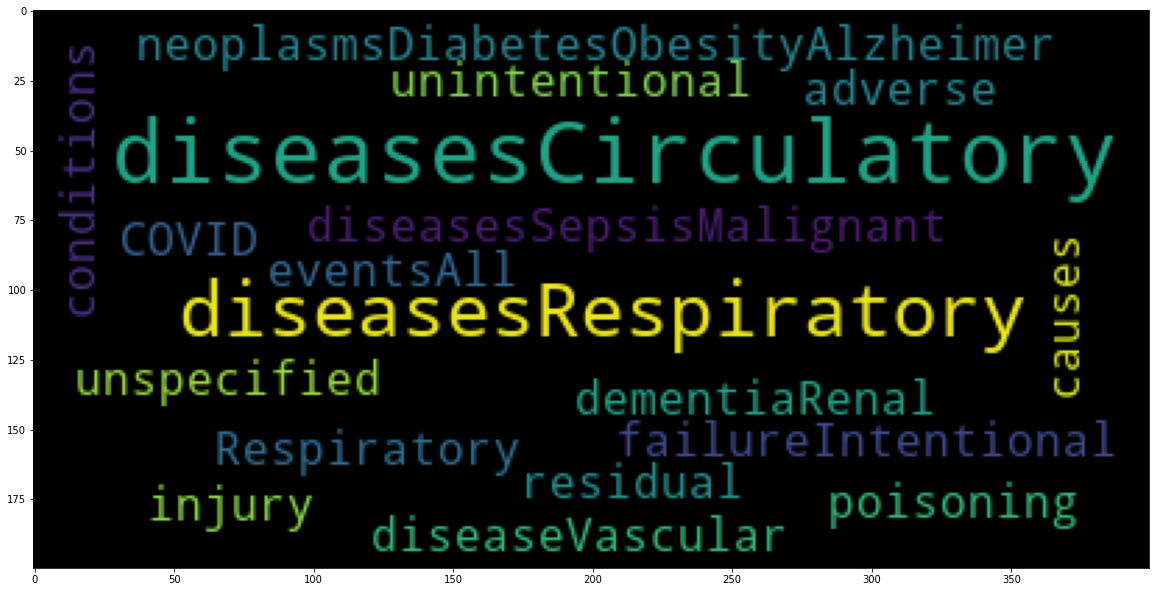

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(string1))

###WordCloud 2- Conditions

In [ ]:
list2 = filter2["Condition Group"].tolist()

In [ ]:
string2 = "".join(list2)

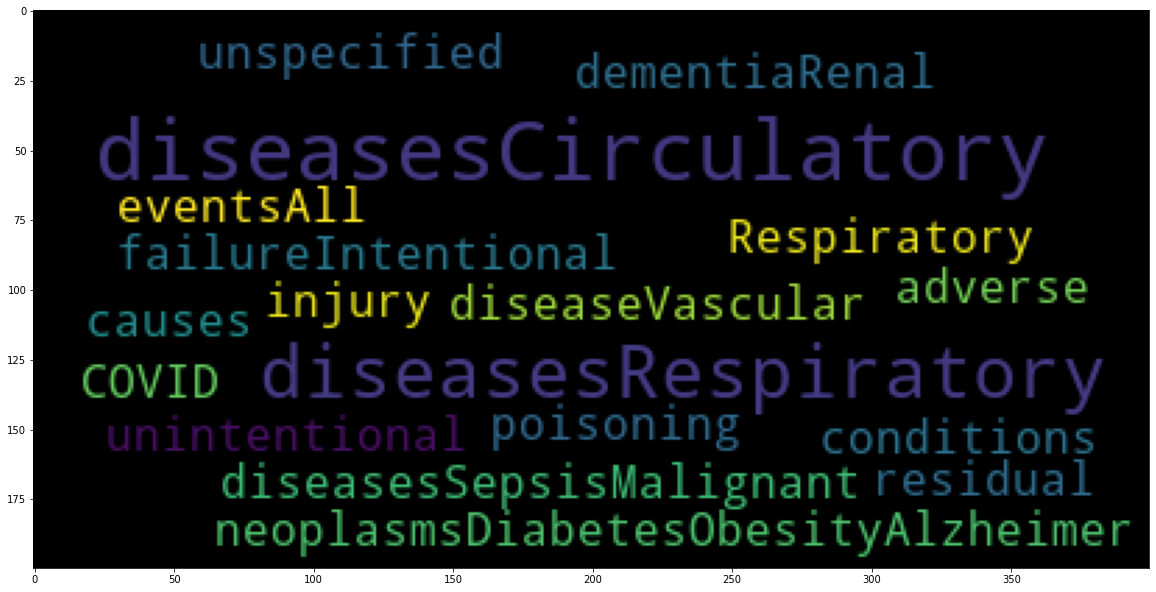

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(string2))